# AI IN ENGINEERING, EL 367
## End of Semester Project: Online Food Data Analysis
### Group 10B

This project is the windup of the semester's work by Group 10B, EL3, UMaT class of 2024. Our objective was to apply our knowledge of Artificial Intelligence to a practical use case involving online food data.

We have developed a comprehensive full-stack web application that enables users to explore the food data in depth. Additionally, our application can predict whether a customer review is positive or negative.

The complete source code and documentation for this project are available in our [GitHub repository](https://github.com/Aaron-Ontoyin/Online-Food-Analysis).

This project is supervised by Mr. Kobina Abaka Painstail, a lecturer at the University of Mines and Technology, Tarkwa, Ghana.

<h4 style="color: #ffff00;">Experience our Project</h4>

To fully experience the functionality of our project, please visit our [project's website](https://online-food-analysis.streamlit.app/).

### Group Members
- FOE.41.006.205.21 WUSAH, Mahama
- FOE.41.006.206.21 YAHAYA, Hudu
- FOE.41.006.207.21 YALLEY, Emmanuel Kobina
- FOE.41.006.208.21 YAMOAH, Emmanuel
- FOE.41.006.209.21 YAMOAH-ASANTE, Michael Papa Kwadwo
- FOE.41.006.210.21 YIN, Aaron Ontoyin
- FOE.41.006.211.21 YIRENKYI, Juliet Mante (Miss)
- FOE.41.006.212.21 YOPAAL, Christopher
- FOE.41.006.213.21 ZAKARIYYA, Firdaus Nebia (Miss)
- FOE.41.006.214.21 ZONG, Bernard Ndeng-Bangme
- BS422100920 ADU, Louis Kofi Seyram

<h4 style="color: aliceblue">This notebook acts as a codebase for the entire project, highlighting all the important lines and functions as below.</h4>

<h2 style="color: #bbccff; text-decoration: underline">Data Exploration</h2>

Libraries Importaion

In [1]:
import pandas as pd
import plotly.express as px
from plotly.figure_factory import create_distplot
import plotly.graph_objs as go

Data Loading

In [2]:
df = pd.read_csv('../dataset/onlinefoods.csv') # Change the path to the data according to the dir structure of your computer
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


Drop unneccessary columns: `Unamed: 12` and `Pin code`. `Pin code` is just an ID

In [3]:
df.drop(columns = ['Pin code','Unnamed: 12'], axis = 1, inplace = True)
df.tail() # last 5 rows. Just to see the data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Output,Feedback
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,Yes,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,Yes,Positive
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,Yes,Positive


Let's see an overview of the data

In [4]:
df.describe() # summary: statistics of numerical columns

,Age,Family size,latitude,longitude
count,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160
std,2.975593,1.351025,0.044489,0.051354
min,18.000000,1.000000,12.865200,77.484200
25%,23.000000,2.000000,12.936900,77.565275
50%,24.000000,3.000000,12.977000,77.592100
75%,26.000000,4.000000,12.997025,77.630900
max,33.000000,6.000000,13.102000,77.758200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Output                      388 non-null    object 
 10  Feedback                    388 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 33.5+ KB


There are no null values!

We created 3 custom funtions for exploring the data
- `unilabel_dist_plot`: For plotting graphs using a single column of the data. The following graphs apply: "histogram", "bar chart", "boxplot", "violin chart", "kde plot", "pie"
- `bilable_dist_plot`: For plotting graphs using two columns of the data: The following graphs apply: "bar", "boxplot", "violin chart"
- `multiabel_dist_plot`: For plotting graphs using 3, 4 or 5 columns of the data: Only histogram is allowed here.

In [6]:
from typing import Literal

In [39]:
def unilabel_dist_plot(
    label,
    type_=Literal[
        "histogram", "bar chart", "boxplot", "violin chart", "kde plot", "pie chart"
    ],
) -> go.Figure:
    """
    Plots a distribution of the dataset.

    Args
        label: str
            The column name to be plotted.
        type_ (Literal["histogram", "bar chart", "boxplot", "violin chart", "kde plot", "pie"]):
            The type of plot to generate. Options are:
            - "histogram": Generate a histogram plot.
            - "bar chart": Generate a bar chart plot.
            - "boxplot": Generate a boxplot plot.
            - "violin chart": Generate a violin chart plot.
            - "kde plot": Generate a kernel density estimation plot.
            - "pie": Generate a pie chart plot.


    Returns
        fig: plotly.graph_objs.Figure
            A plotly plot figure.
    """
    fig = go.Figure()
    yaxis_title = "Count"
    xaxis_title = label

    if type_ == "histogram":
        fig.add_trace(go.Histogram(x=df[label]))
    elif type_ == "bar chart":
        fig.add_trace(
            go.Bar(x=df[label].value_counts().index, y=df[label].value_counts().values)
        )
    elif type_ == "boxplot":
        fig.add_trace(go.Box(y=df[label], boxmean=True))
    elif type_ == "violin chart":
        fig.add_trace(go.Violin(y=df[label], box_visible=True, meanline_visible=True))
        yaxis_title = label
        xaxis_title = ""
    elif type_ == "kde plot":
        if type(df[label].iloc[0]) == str:
            return "Cannot plot a KDE plot for a non-numeric column."
        fig = create_distplot(
            [df[label].dropna().values], group_labels=[label], show_hist=False
        )
        yaxis_title = "Density"
    elif type_ == "pie chart":
        fig.add_trace(
            go.Pie(
                labels=df[label].value_counts().index,
                values=df[label].value_counts().values,
            )
        )
        yaxis_title = ""
        xaxis_title = ""
    else:
        raise ValueError(
            "Invalid type. It must be either 'histogram', 'bar chart', 'boxplot', 'violin chart', 'kde plot', or 'pie chart."
        )

    fig.update_layout(
        title=f"{type_.title()} of {label.title()} Distribution",
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
    )
    return fig

In [19]:
def bilable_dist_plot(
    label1, label2, type_=Literal["bar", "boxplot", "violin chart"]
) -> go.Figure:
    """
    Plots 2 labels againts each other from the dataset.

    Args
        label1: str
            The first column name to be plotted.
        label2: str
            The second column name to be plotted.
        type_: (Literal["boxplot", "violin chart"])
            The type of plot to generate.

    Returns
        fig: plotly.graph_objs.Figure
            A plotly plot figure.
    """
    fig = go.Figure()
    xaxis_title = label1

    if type_ == "bar":
        fig = px.bar(df, x=label1, color=label2, barmode="group")
        yaxis_title = "Count"
    elif type_ == "boxplot":
        fig.add_trace(go.Box(x=df[label1], y=df[label2], boxmean=True))
        yaxis_title = label2
        xaxis_title = label1
    elif type_ == "violin chart":
        fig.add_trace(
            go.Violin(
                x=df[label1], y=df[label2], box_visible=True, meanline_visible=True
            )
        )
        yaxis_title = label2
        xaxis_title = label1
    else:
        raise ValueError(
            "Invalid type. It must be either 'bar', 'boxplot', or 'violin chart."
        )
    fig.update_layout(
        title=f"{type_.title()} of {label1.title()} vs {label2.title()}",
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
    )
    return fig

In [28]:
def multiabel_dist_plot(label1, label2, label3, label4=None, label5=None) -> go.Figure:
    """
    Plots 3, 4 or 5 labels againts each other from the dataset.

    Args
        label1: str
            The first column name to be plotted.
        label2: str
            The second column name to be plotted.
        label3: str
            The third column name to be plotted.
        label4: str
            The fourth column name to be plotted.
        label5: str
            The fifth column name to be plotted.

    Returns
        fig: plotly.graph_objs.Figure
            A plotly plot figure.
    """

    title = f"{label1.title()} vs {label2.title()} vs {label3.title()}"
    if label4:
        title = f"{title} vs {label4.title()}"
    if label5:
        title = f"{title} vs {label5.title()}"
    fig = px.histogram(
        df,
        x=label1,
        facet_row=label2,
        facet_col=label3,
        animation_frame=label4,
        color=label5,
        title=title,
    )

    return fig

You can use the functions above to plot the distribution of the dataset and get more insigts.
Multicolinarity is a situation where two or more features in a dataset are highly correlated. This can lead to overfitting in a machine learning model. You can use the functions to check for multicollinearity. This cannot affect our model that much since the data is small and our boosting algorithms can withstand it. So we won't be doing more exploration but these functions are available for easy explaration by anyone.
See examples below:

In [129]:
unilabel_dist_plot("Occupation", "violin chart") # Distribution of Occupation using a violin chart

In [14]:
unilabel_dist_plot("Occupation", "pie chart") # Distribution of Occupation using a pie chart

In [16]:
bilable_dist_plot("Occupation", "Gender", "bar") # Distribution of Occupation vs Gender using a bar chart

In [18]:
bilable_dist_plot("Occupation", "Age", "boxplot") # Distribution of Occupation vs Gender using a boxplot

In [31]:
multiabel_dist_plot("Educational Qualifications", "Gender", "Marital Status", "Occupation", "Feedback") # Distribution of Educational Qualifications vs Gender vs Marital Status vs Occupation

Note that the functions would always give a plot but the plot may not be meaningful if the wrong parameters are passed. You should know what you wanna investigate before calling the functions.

<h2 style="color: #bbccff; text-decoration: underline">ML Model</h2>

The data is simple and do not need a lot of exploration for our model.
We would be using ada boost and gradient boost. We would use the one that does better for the app

In [33]:
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.metrics import roc_curve, auc

Let's label encode the categorical columns into numerical format

In [35]:
le = LabelEncoder()
dict_label_encoder = {} # We're storing this in a dict so that, we can use is to later encode the input from the app. 
for i in [
    "Gender",
    "Marital Status",
    "Occupation",
    "Monthly Income",
    "Educational Qualifications",
    "Output",
    "Feedback",
]:
    df[i] = le.fit_transform(df[i])
    dict_label_encoder[i] = dict(zip(le.classes_, le.transform(le.classes_)))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    int32  
 2   Marital Status              388 non-null    int32  
 3   Occupation                  388 non-null    int32  
 4   Monthly Income              388 non-null    int32  
 5   Educational Qualifications  388 non-null    int32  
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Output                      388 non-null    int32  
 10  Feedback                    388 non-null    int32  
dtypes: float64(2), int32(7), int64(2)
memory usage: 22.9 KB


In [36]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Output,Feedback
0,20,0,2,3,4,2,4,12.9766,77.5993,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,1,0
3,22,0,2,3,4,0,6,12.9473,77.5616,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,1,1


In [37]:
df.describe()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Output,Feedback
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,0.572165,1.412371,1.902062,2.713918,1.069588,3.280928,12.972058,77.600160,0.775773,0.817010
std,2.975593,0.495404,0.895035,1.329722,1.491790,1.035695,1.351025,0.044489,0.051354,0.417611,0.387157
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.865200,77.484200,0.000000,0.000000
25%,23.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,12.936900,77.565275,1.000000,1.000000
50%,24.000000,1.000000,2.000000,3.000000,3.000000,1.000000,3.000000,12.977000,77.592100,1.000000,1.000000
75%,26.000000,1.000000,2.000000,3.000000,4.000000,2.000000,4.000000,12.997025,77.630900,1.000000,1.000000
max,33.000000,1.000000,2.000000,3.000000,4.000000,4.000000,6.000000,13.102000,77.758200,1.000000,1.000000


Let's inspect the data for correlation between the features.

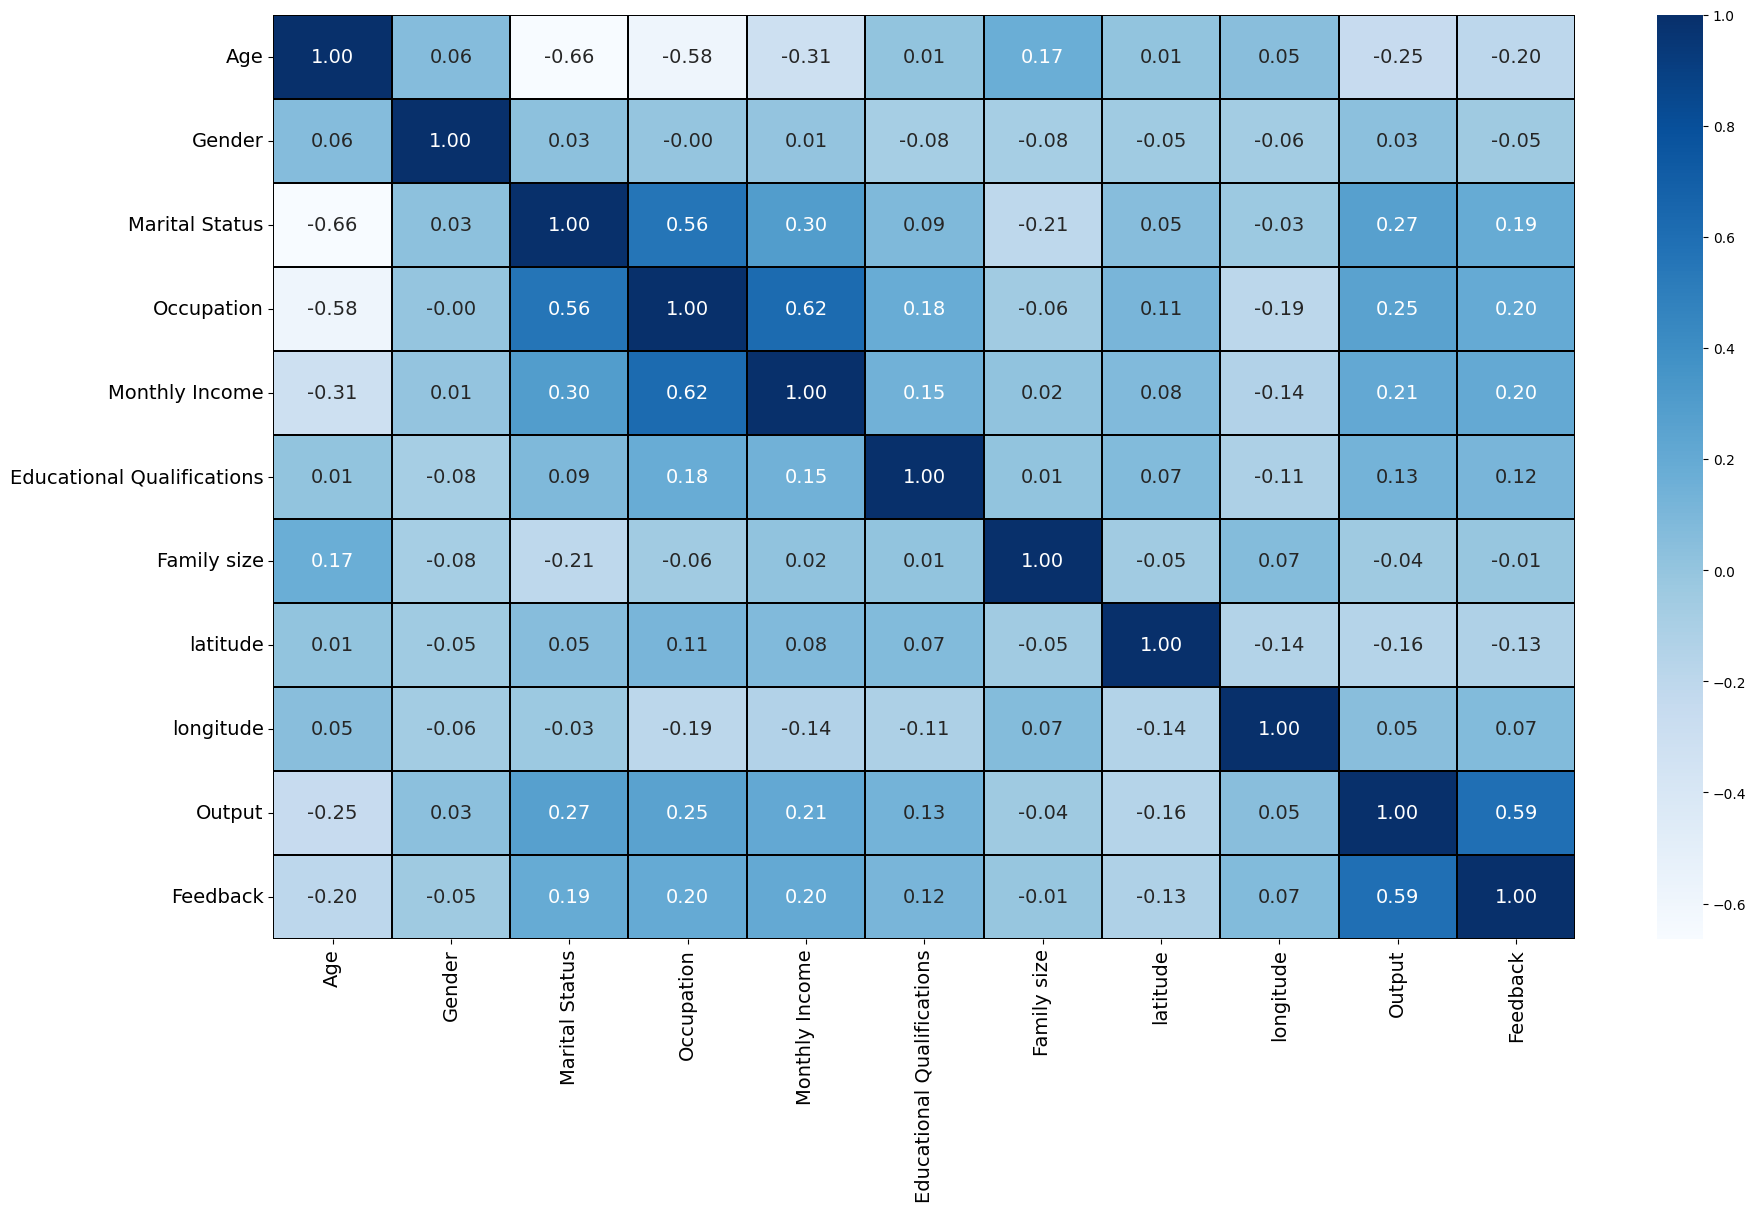

In [38]:
plt.figure(figsize=(21, 12))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt="0.2f",
    linecolor="black",
    linewidths="0.01",
    cmap="Blues",
    annot_kws={"fontsize": 14},
)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14, rotation=90)
plt.show()

Highest correlation is 0.62 between Monthly Income and Occupation. Not much of a problemm
Let's split the data into train and test

In [140]:
X = df.drop(columns=["Feedback"], axis=1)
y = df["Feedback"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=123
)

Let's scale the data using StandardScaler.

In [142]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

Let's write functions to evaluate the models since we're using two types of models.
This would allow us to reuse the code

In [143]:
def model_evaluate(yt, yp):
    metrics = {}
    metrics["accuracy"] = accuracy_score(yt, yp)
    metrics["precision"], metrics["recall"], metrics["fscore"], _ = (
        precision_recall_fscore_support(yt, yp, average="weighted")
    )

    metrics_names = list(metrics.keys())
    metrics_values = list(metrics.values())

    ax = sns.barplot(x=metrics_names, y=metrics_values, palette="viridis")
    plt.title("Model Evaluation metrics")
    plt.ylim(0, 1)
    plt.ylabel("Value")

    for i, v in enumerate(metrics_values):
        ax.text(
            i, v / 2, f"{v:.2f}", ha="center", va="center", color="white", fontsize=12
        )
    plt.show()


def class_report(yt, yp):
    cr = pd.DataFrame(classification_report(yt, yp, output_dict=True))
    return cr.T.style.background_gradient(axis=0, cmap="Blues")


def conf_matrix(yt, yp):
    cm = confusion_matrix(yt, yp)
    sns.heatmap(
        cm, annot=True, fmt="0.2f", linecolor="black", linewidths="0.02", cmap="Blues"
    )
    plt.title("Confusion Matrix")
    plt.ylabel("Actual Class")
    plt.xlabel("Predicted Class")
    plt.show()


def plot_roc(yt, yp):
    fpr, tpr, thr = roc_curve(yt, yp)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(
        fpr, tpr, color="darkorange", lw=2, label=f"roc_curve (area = {roc_auc : 0.3f})"
    )
    plt.plot([0.0, 1.0], [0.0, 1.0], color="navy", lw=2, linestyle="--")
    plt.xlim([-0.01, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC CURVE")
    plt.legend(loc="lower right")
    plt.show()

### Gradient Boosting Classifier:

In [145]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier()

params_grid = {
    "n_estimators": [20 * n for n in range(1, 21)],
    "learning_rate": [0.1, 0.01, 0.001, 0.0001],
    "subsample": [1.0, 0.5],
    "max_features": [1, 2, 3, 4, 5],
}

grid_search = GridSearchCV(
    estimator=gbc, param_grid=params_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid_search.fit(X_train, y_train.values.ravel())

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 260, 'subsample': 0.5}
Best Score: 0.8580645161290322


In [ ]:
grid_search.best_estimator_

GradientBoostingClassifier(max_features=2, n_estimators=260, subsample=0.5)

In [147]:
y_pred = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.818182,0.642857,0.720000,14.000000
1,0.925373,0.968750,0.946565,64.000000
accuracy,0.910256,0.910256,0.910256,0.910256
macro avg,0.871777,0.805804,0.833282,78.000000
weighted avg,0.906134,0.910256,0.905899,78.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_19816\3526893169.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




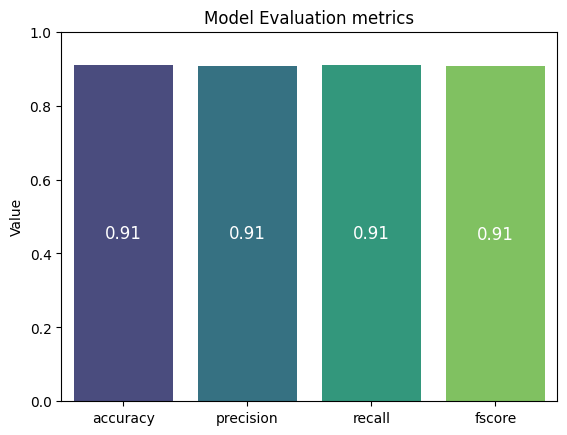

In [148]:
model_evaluate(y_test, y_pred)

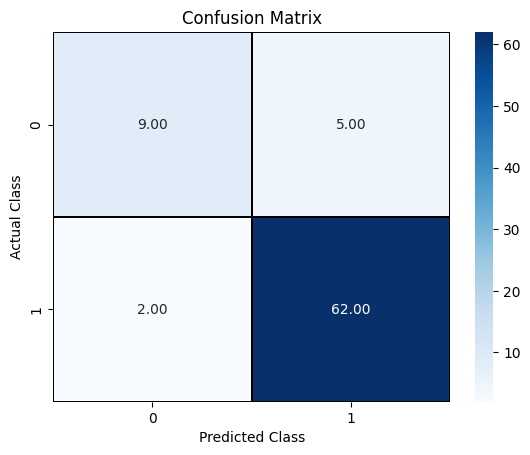

In [149]:
conf_matrix(y_test, y_pred)

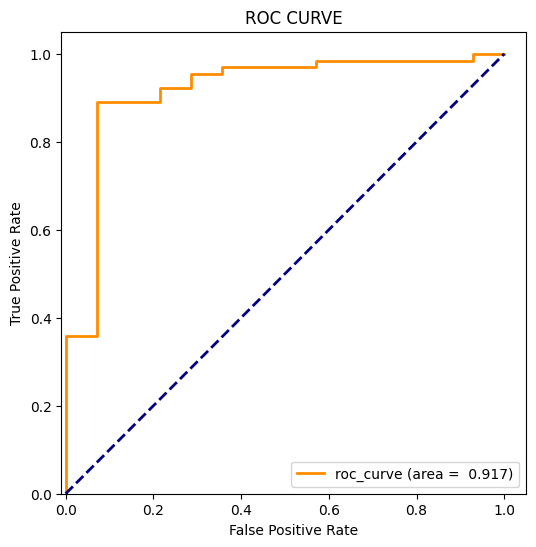

In [150]:
plot_roc(y_test, y_pred_prob[:,1])

### Ada Boosting Classifier:

In [152]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=12))

params_grid = {
    "n_estimators": [20 * n for n in range(1, 21)],
    "learning_rate": [0.1, 0.01, 0.001, 0.0001],
    "estimator__criterion": ["gini", "entropy"],
}

grid_search = GridSearchCV(
    estimator=abc, param_grid=params_grid, cv=5, scoring="accuracy", n_jobs=-1
)

grid_search.fit(X_train, y_train.values.ravel())
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'estimator__criterion': 'entropy', 'learning_rate': 0.001, 'n_estimators': 200}
Best Score: 0.8451612903225806


In [153]:
grid_search.best_estimator_

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    random_state=12),
                   learning_rate=0.001, n_estimators=200)

In [154]:
y_pred = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.833333,0.714286,0.769231,14.000000
1,0.939394,0.968750,0.953846,64.000000
accuracy,0.923077,0.923077,0.923077,0.923077
macro avg,0.886364,0.841518,0.861538,78.000000
weighted avg,0.920357,0.923077,0.920710,78.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_19816\3526893169.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




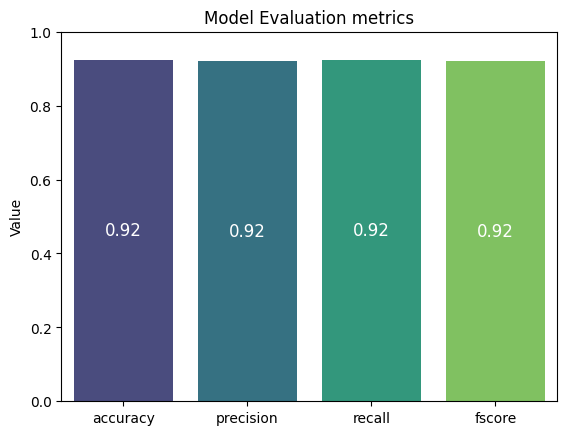

In [155]:
model_evaluate(y_test, y_pred)

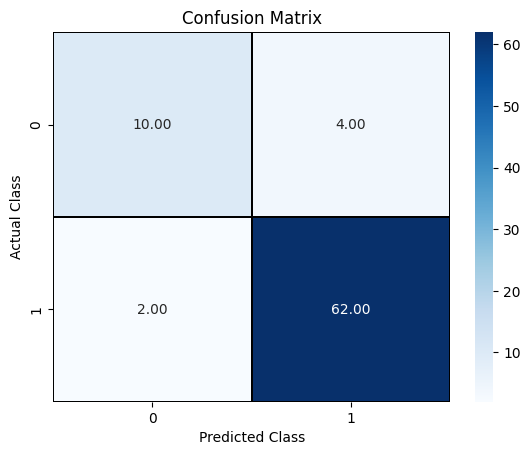

In [156]:
conf_matrix(y_test, y_pred)

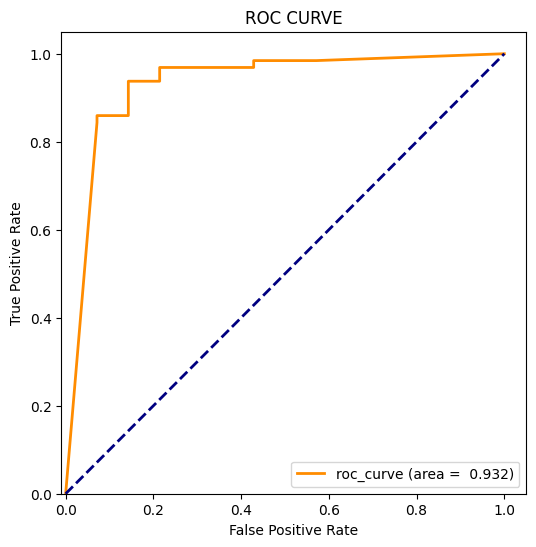

In [157]:
plot_roc(y_test, y_pred_prob[:,1])

### Conclusion:
Which performs better? Which would we use?

Adaboost does better so we'd store it and use for the app.

In [ ]:
# Save the best estimator, the scaller and encoder as pickle files so we'd load into the app
import pickle

# Change the path for the storage according to the dir structure of your computer and where you wanna store
with open("./model/model.pkl", "wb") as f:
    pickle.dump(grid_search.best_estimator_, f)

class_report(y_test, y_pred).to_html("./model/model_report.html")

with open("./model/std_scaler.pkl", "wb") as f:
    pickle.dump(std_scaler, f)

with open("./model/label_encoder_dict.pkl", "wb") as f:
    pickle.dump(dict_label_encoder, f)